In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame 

In [3]:
df = pd.read_csv('./kz_ghcn_processed_1981_1999.csv')

In [4]:
pd.set_option('display.max_rows',6)

In [5]:
df

,DATE,UIL KZ,KAZALINSK KZ,KOKPEKTY KZ,SEMEJ KZ,KUSTANAI KZ,URALSK KZ,BALHASH KZ,KZYLZAR KZ,KARAGANDA KZ,ZHARKENT KZ,ATBASAR KZ,ASTANA KZ,ARALSKOE MORE KZ,ALMATY KZ,AKTOBE KZ,SAM KZ,PETROPAVLOVSK KZ,ATYRAU KZ,IRTYSHSK KZ
0,1980-01-01,-16.1,-15.3,-22.3,-15.9,-19.3,-15.1,-14.1,-17.5,-15.0,-7.0,-20.7,-17.8,-16.0,-5.7,-17.3,-14.1,-20.1,-13.1,-19.2
1,1980-02-01,-16.3,-15.0,-18.3,-16.3,-20.9,-15.1,-12.5,-16.7,-13.2,-4.6,-19.2,-16.6,-16.2,-5.6,-17.9,-9.7,-18.9,-9.9,-18.3
2,1980-03-01,-8.9,-6.4,-13.3,-11.2,-12.4,-9.3,-5.5,-10.3,-9.2,3.2,-13.2,-11.5,-8.3,0.5,-10.2,-2.3,-11.3,-2.9,-11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1999-10-01,10.2,12.1,5.6,7.5,8.2,8.8,9.8,8.9,8.3,13.4,7.5,8.0,12.2,12.6,8.7,12.7,7.2,12.2,7.3
238,1999-11-01,-5.3,-1.4,-7.0,-4.5,-8.4,-6.8,-2.0,-6.1,-6.6,4.0,-8.9,-8.1,-3.3,3.1,-6.6,-1.3,-9.3,-2.3,-8.0
239,1999-12-01,-3.3,-2.4,-14.4,-7.1,-6.4,-3.8,-7.9,-9.6,-8.4,0.4,-10.1,-9.8,-3.8,0.4,-5.1,-0.8,-8.1,-0.3,-9.3


In [6]:
z = df.set_index('DATE').mean()

In [7]:
xy = pd.read_csv('kz_locations.csv')

In [8]:
xy

,STATION_NAME,LONGITUDE,LATITUDE
0,UIL KZ,54.6831,49.0667
1,KAZALINSK KZ,62.1170,45.7670
2,KOKPEKTY KZ,82.3670,48.7500
...,...,...,...
16,PETROPAVLOVSK KZ,69.1500,54.8331
17,ATYRAU KZ,51.9167,47.1167
18,IRTYSHSK KZ,75.4500,53.3500


In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

/home/ek777/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/ek777/anaconda/lib/python2.7/site-packages/numpy/lib/shape_base.py:431: FutureWarning: in the future np.array_split will retain the shape of arrays with a zero size, instead of replacing them by `array([])`, which always has a shape of (0,).
  FutureWarning)


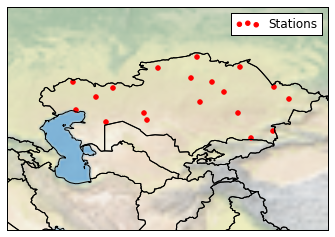

In [10]:
lat_KZ = np.array(xy['LATITUDE'])
lon_KZ = np.array(xy['LONGITUDE'])

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([42,88,30,60])

countries = cfeature.NaturalEarthFeature(\
                                        category='cultural',\
                                        name='admin_0_countries',\
                                        scale='50m',\
                                        facecolor='none')
ax.add_feature(countries)
dots2 = plt.scatter(lon_KZ,lat_KZ, color='red',transform=ccrs.Geodetic(),label='Stations')

ax.legend()

## Axes and Map Projection

The line `plt.axes(projection=ccrs.PlateCarree())` sets up a `GeoAxes` instance which exposes a variety of other map related methods.

So, first of all, you have to get the `GeoAxes`.

**P.S.** ax.plot( ) **equals to ** plt.plot( ), exactly the same!

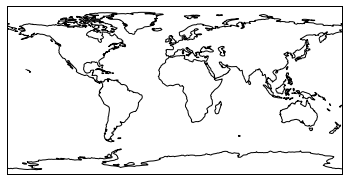

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

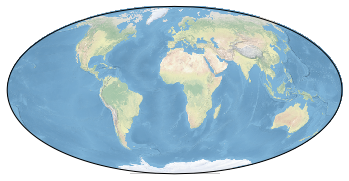

In [12]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()

## Adding data to map

By default, the coordinate system of any data added to a GeoAxes is the same as the coordinate system of the GeoAxes itself, to control which coordinate system that the given data is in, you can add the transform keyword with an appropriate cartopy.crs.CRS instance:

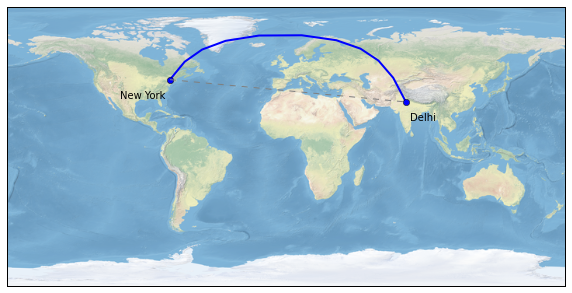

In [13]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())


### Subplot and set_extent

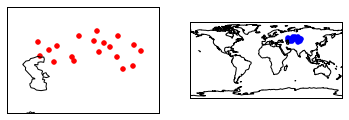

In [14]:
ax = plt.subplot(121,projection=ccrs.PlateCarree())
ax.set_extent([42,88,30,60])
ax.coastlines()
ax.scatter(lon_KZ,lat_KZ, color='red',transform=ccrs.PlateCarree(),label='Stations')

ax = plt.subplot(122,projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.scatter(lon_KZ,lat_KZ, color='b',transform=ccrs.Geodetic(),label='Stations')


## Contour Plot

* N: contour N automatically-chosen levels.

/home/ek777/anaconda/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


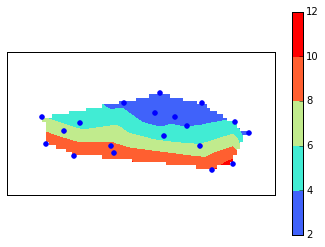

In [15]:
ax = plt.axes(projection=ccrs.PlateCarree())



xi,yi = np.meshgrid(np.arange(48,85,0.5),np.arange(60,40,-0.5))

# grid the data.
from matplotlib.mlab import griddata
zi = griddata(xy.LONGITUDE, xy.LATITUDE, z, xi, yi, interp='linear')

N = 5

CS = plt.contourf(xi, yi, zi, N, cmap=plt.cm.rainbow,
                  vmax=int(zi.max()), vmin=int(zi.min()))
plt.colorbar() 

# plot data points.
ax.scatter(xy.LONGITUDE,xy.LATITUDE, color='b',transform=ccrs.PlateCarree(),label='Stations')


### Orthographic

class `cartopy.crs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=None)`

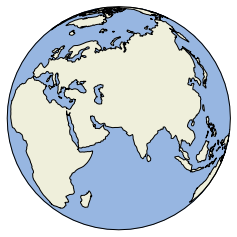

In [16]:
from cartopy import feature

ax = plt.axes(projection=ccrs.Orthographic(65, 30))

ax.add_feature(feature.OCEAN, zorder=0)
ax.add_feature(feature.LAND, zorder=0, edgecolor='black')

### Cartopy map gridlines and tick labels

In [17]:
import matplotlib.ticker as mticker

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


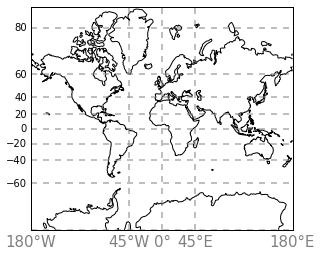

In [18]:
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
#gl.ylabels_left = False
#gl.xlabels_bottom = False
gl.ylabels_right = False

#gl.xlines = False
#gl.ylines = False

gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])

gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER

gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

### The cartopy Feature interface

* To simplify some very common cases, some pre-defined Features exist as cartopy.feature constants. The pre-defined Features are all small-scale (1:110m) Natural Earth datasets, and can be added with methods such as GeoAxes.add_feature:

|Name	|Description|
|:-------------------------------|------------:|
|cartopy.feature.BORDERS|Country boundaries.|
|cartopy.feature.COASTLINE|Coastline, including major islands.|
|cartopy.feature.LAKES|Natural and artificial lakes.|
|cartopy.feature.LAND|Land polygons, including major islands.|
|cartopy.feature.OCEAN|Ocean polygons.|
|cartopy.feature.RIVERS|Single-line drainages, including lake centerlines.|

* 

In [19]:
import cartopy.feature as cfeature

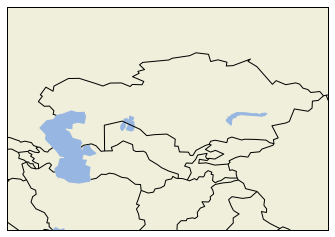

In [20]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([42,88,30,60])

# Put a background image on for nice sea rendering.
# ax.stock_img()



ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)


### Shapefile read

and extract feature from records

In [21]:
import cartopy.io.shapereader as shpreader

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

In [22]:
reader = shpreader.Reader(shpfilename)

In [26]:
import itertools

In [27]:
def extract_geometries(reader, select_dict):
    records = reader.records()
    
    key = select_dict.keys()[0]
    value = select_dict[key]
    
    filter_geo = lambda x: x.attributes[key]==value
    return [item.geometry for item in itertools.ifilter(filter_geo,records)]

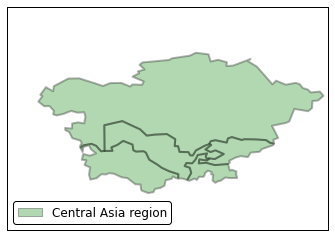

In [28]:

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([42,88,30,60])
#ax.set_global()
select_dict = {'subregion':'Central Asia'}

ax.add_geometries(extract_geometries(reader,select_dict),ccrs.PlateCarree(),\
                 facecolor='g',edgecolor='black',alpha=0.3,linewidth=2)

import matplotlib.patches as mpatches

# make two proxy artists to add to a legend
central_asia_legend_proxy = mpatches.Rectangle((0, 0), 1, 1, facecolor="g",alpha=0.3)

labels = ['Central Asia region']

plt.legend([central_asia_legend_proxy], labels,\
            loc='lower left', bbox_to_anchor=(0, 0), fancybox=True)


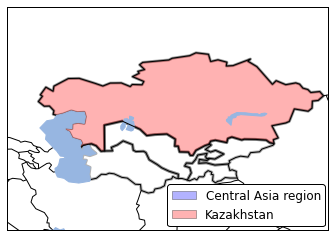

In [29]:

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([42,88,30,60])
#ax.set_global()
select_dict = {'subregion':'Central Asia'}

ax.add_geometries(extract_geometries(reader,select_dict),ccrs.PlateCarree(),\
                 facecolor='white',edgecolor='black',alpha=0.3,linewidth=3)

select_dict2 = {'name':'Kazakhstan'}

ax.add_geometries(extract_geometries(reader,select_dict2),ccrs.PlateCarree(),\
                 facecolor='red',edgecolor='black',alpha=0.3,linewidth=2)

ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)

import matplotlib.patches as mpatches

# make two proxy artists to add to a legend
central_asia_legend_proxy = mpatches.Rectangle((0, 0), 1, 1, facecolor=None,alpha=0.3)
kz_legend_proxy = mpatches.Rectangle((0, 0), 1, 1, facecolor="red",alpha=0.3)
labels = ['Central Asia region','Kazakhstan']

plt.legend([central_asia_legend_proxy,kz_legend_proxy], labels,\
            loc='lower left', bbox_to_anchor=(0.48, -0.01), fancybox=True)


### Seaborn

In [30]:
import seaborn as sns

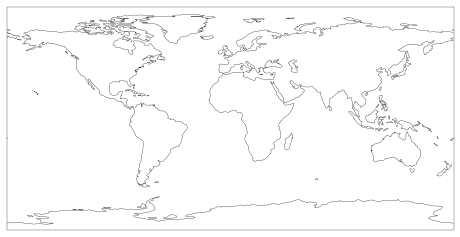

In [31]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

<matplotlib.colorbar.Colorbar instance at 0x7f17db3e2560>

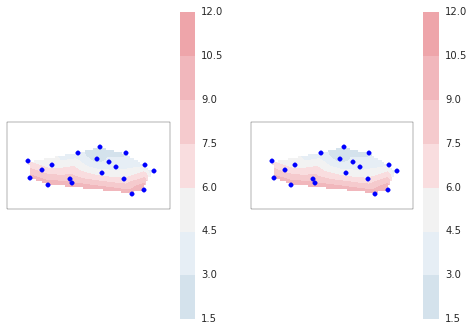

In [32]:

ax = plt.subplot(121,projection=ccrs.PlateCarree())
xi,yi = np.meshgrid(np.arange(48,85,0.5),np.arange(60,40,-0.5))

# grid the data.
from matplotlib.mlab import griddata
zi = griddata(xy.LONGITUDE, xy.LATITUDE, z, xi, yi, interp='linear')

N = 7

CS = plt.contourf(xi, yi, zi, N, cmap=sns.diverging_palette(240,10, n=7,as_cmap=True),\
                  vmax=20, vmin=-10)
#                  vmax=int(zi.max()), vmin=int(zi.min()))


# plot data points.
ax.scatter(xy.LONGITUDE,xy.LATITUDE, color='b',transform=ccrs.PlateCarree(),label='Stations')
plt.colorbar() 

ax = plt.subplot(122,projection=ccrs.PlateCarree())
xi,yi = np.meshgrid(np.arange(48,85,0.5),np.arange(60,40,-0.5))
zi = griddata(xy.LONGITUDE, xy.LATITUDE, z, xi, yi, interp='linear')
CS = plt.contourf(xi, yi, zi, N, cmap=sns.diverging_palette(240,10, n=7,as_cmap=True),\
                  vmax=20, vmin=-10)
ax.scatter(xy.LONGITUDE,xy.LATITUDE, color='b',transform=ccrs.PlateCarree(),label='Stations')


plt.colorbar() 

<matplotlib.colorbar.Colorbar instance at 0x7f17da9fedd0>

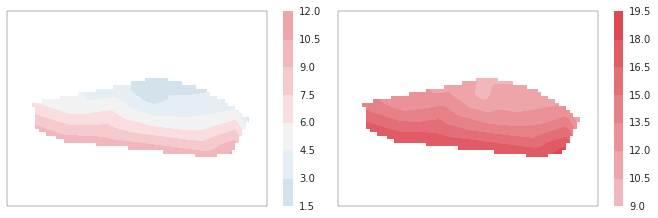

In [36]:
fig = plt.figure(figsize=[10, 3])

xi,yi = np.meshgrid(np.arange(48,85,0.5),np.arange(60,40,-0.5))

# grid the data.
from matplotlib.mlab import griddata
zi = griddata(xy.LONGITUDE, xy.LATITUDE, z, xi, yi, interp='linear')

ax1 = fig.add_axes()

ax1 = plt.subplot(121,projection=ccrs.PlateCarree())


fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

cf = ax1.contourf(xi, yi, zi, N, cmap=sns.diverging_palette(240,10, n=7,as_cmap=True),\
                  vmax=20, vmin=-10)
fig.colorbar(cf)
ax2 = plt.subplot(122,projection=ccrs.PlateCarree(),\
                 sharex=ax1, sharey=ax1)
cf2 = ax2.contourf(xi, yi, zi+8, N, cmap=sns.diverging_palette(240,10, n=7,as_cmap=True),\
                  vmax=20, vmin=-10)

fig.colorbar(cf2)